In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# DATA CLEANING

In [15]:
videos = pd.read_csv("FRvideos.csv")

yt_videos = videos.dropna(how='any',axis=0)
yt_videos.describe()
yt_videos.drop(['video_id','thumbnail_link'],axis=1,inplace=True)
yt_videos.apply(lambda x: len(x.unique()))

publish_time = pd.to_datetime(yt_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
yt_videos['publish_time'] = publish_time.dt.time
yt_videos['publish_date'] = publish_time.dt.date
yt_videos['publish_date'] = publish_time.dt.date

yt_videos.drop(['trending_date','publish_date','publish_time','tags','title','description','channel_title','comments_disabled','ratings_disabled','video_error_or_removed', 'category_id'],axis=1,inplace=True)

c:\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
c:\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

# LINEAR REGRESSION

In [10]:
views = yt_videos['views']
youtube_view = yt_videos.drop(['views'],axis=1,inplace=False)
train, test, y_train, y_test = train_test_split(youtube_view,views, test_size=0.2,shuffle=False)
print(train.shape, test.shape, y_train.shape, y_test.shape)
# REGRESSION ANALYSIS
youtube_view
# LINEAR REGRESSION

(30249, 3) (7563, 3) (30249,) (7563,)


,likes,dislikes,comment_count
0,29282,1108,3817
1,14053,576,1161
2,76203,477,9580
3,85016,550,4303
4,8091,72,481
...,...,...,...
40718,8688,147,696
40719,307,86,485
40720,2011,999,1397
40721,4601,61,615


Root means score 1141459.9156851368
Variance score: 0.72
Result : 0.7215829252223306
       True Labels  Predicted Labels
32625        29567     111196.497000
32626       104824     120732.569410
32628       198616     425166.901998
32629        18268     108694.264342
32630       238653     364636.189401
...            ...               ...
40718       560827     248949.213259
40719        58758      87481.334042
40720       264639     128497.841202
40721        47510     164780.207053
40722        78117     113680.241490

[7563 rows x 2 columns]


c:\python37\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


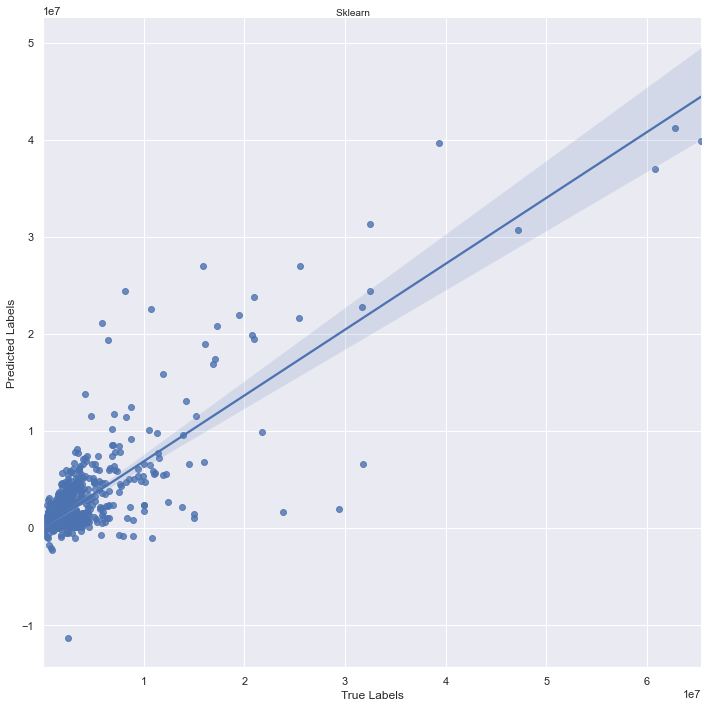

In [11]:
model = LinearRegression()
model.fit(train, y_train)

# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=10)
sns.set(font_scale = 1.2)

In [ ]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# RANDOM FOREST REGRESSOR

In [13]:
nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

train, test, y_train, y_test = train_test_split(youtube_view,views, test_size=0.3,shuffle=False)

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]

grid = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
grid.fit(train, y_train)

print("Best HyperParameter: ",grid.best_params_)
print("Best Score: ",grid.best_score_)
scores = grid.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
maxDepth = grid.best_params_['max_depth']
nEstimators = grid.best_params_['n_estimators']


model = RandomForestRegressor(n_estimators=nEstimators, max_depth=maxDepth)
model.fit(train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.8min finished


Best HyperParameter:  {'max_depth': 10, 'n_estimators': 200}
Best Score:  0.5842058520007334


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Root means score 960495.859687782
Variance score: 0.78
Result : 0.775385021856847
       True Labels  Predicted Labels
28543      1053586      4.223507e+05
28544        82797      3.387213e+05
28545       609593      2.727854e+05
28546       479511      1.681666e+06
28547       251965      1.387642e+05
...            ...               ...
40718       560827      1.511490e+05
40719        58758      7.255215e+04
40720       264639      2.836734e+05
40721        47510      7.304078e+04
40722        78117      6.813769e+04

[11344 rows x 2 columns]


c:\python37\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


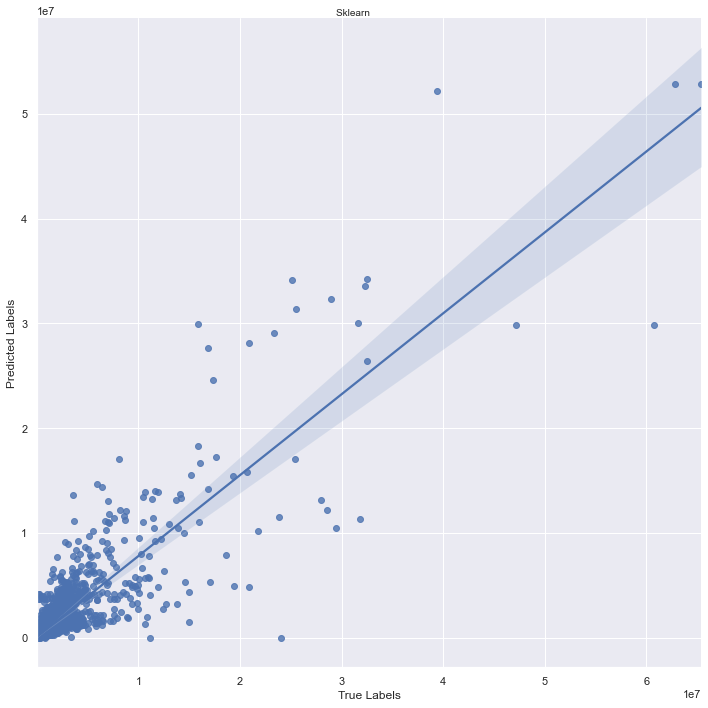

In [17]:
# predicting the  test set results
y_pred = model.predict(test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=10)
sns.set(font_scale = 1.0)

Feature: 0, Score: 0.66722
Feature: 1, Score: 0.21453
Feature: 2, Score: 0.11825


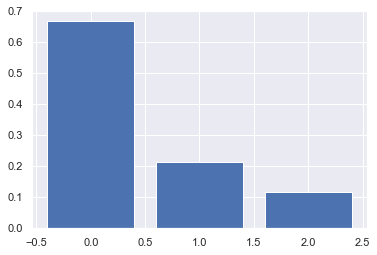

In [18]:
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()